### Data
The dataset I use here is the NYX Taxi Demand dataset, absolutely there are many souce from kaggle


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('nyc_taxi.csv', parse_dates=['timestamp'])


### Data Exploratory

In [2]:
df.head(5)      

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


no matter if we have just two columns, from timestamp we can do some extract for gain some information

In [3]:
df.isnull().sum()

timestamp    0
value        0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
hourly_data = df.set_index('timestamp').resample('H').mean().reset_index()
daily_data = df.set_index('timestamp').resample('D').mean().reset_index()
weekly_data = df.set_index('timestamp').resample('W').mean().reset_index()

C:\Users\balda\AppData\Local\Temp\ipykernel_50336\501188958.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df.set_index('timestamp').resample('H').mean().reset_index()


In [9]:
hourly_data = df.resample('H').mean()
daily_data = df.resample('D').mean()
weekly_data = df.resample('W').mean()

C:\Users\balda\AppData\Local\Temp\ipykernel_51556\554444237.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df.resample('H').mean()


### Data Visualization

In [7]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots


fig = make_subplots(rows=3, cols=1, shared_xaxes=False,
                    subplot_titles=("New York City Taxi Demand Hourly", 
                                    "New York City Taxi Demand Daily", 
                                    "New York City Taxi Demand Weekly"))

fig.add_trace(go.Scatter(x=hourly_data.index, y=hourly_data['value'], mode='lines', name='Hourly'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=daily_data.index, y=daily_data['value'], mode='lines', name='Daily'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=weekly_data.index, y=weekly_data['value'], mode='lines', name='Weekly'),
              row=3, col=1)


fig.update_layout(
    height=900, width=800, showlegend=False, 
    title_text="New York City Taxi Demand (Hourly, Daily, Weekly)",
    xaxis3_title="Date", yaxis_title="Demand",
    plot_bgcolor='rgba(0,0,0,0)',   
    paper_bgcolor='rgba(0,0,0,0)'   
)

fig.update_xaxes(showgrid=True, linecolor='black', linewidth=2, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, linecolor='black', linewidth=2, gridcolor='lightgray')

fig.update_traces(hoverinfo="x+y")

fig.show()

In [8]:
print(df.columns)


Index(['timestamp', 'value'], dtype='object')


In [12]:
for DataFrame in [hourly_data, daily_data]:
    DataFrame['Weekday'] = pd.Categorical(DataFrame['timestamp'].dt.strftime('%A'),
                                           categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    DataFrame['Hour'] = DataFrame['timestamp'].dt.hour
    DataFrame['Day'] = DataFrame['timestamp'].dt.weekday
    DataFrame['Month'] = DataFrame['timestamp'].dt.month
    DataFrame['Year'] = DataFrame['timestamp'].dt.year
    DataFrame['Month_day'] = DataFrame['timestamp'].dt.day
    DataFrame['Lag'] = DataFrame['value'].shift(1)
    DataFrame['Rolling_Mean'] = DataFrame['value'].rolling(7, min_periods=1).mean()
    DataFrame.dropna(inplace=True)


In [13]:
import plotly.express as px

fig = px.histogram(df['value'], nbins=50, title="Overall Value Distribution",
                   labels={'value': 'Value'}, marginal='density')
fig.update_layout(xaxis_title='Value', yaxis_title='Density', width=700, height=300)
fig.show()


AttributeError: 'NoneType' object has no attribute 'constructor'

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
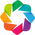

:Distribution   [value]   (Density)

In [14]:
import holoviews as hv
import holoviews.plotting.bokeh
from holoviews import opts

hv.extension('bokeh')

distribution_plot = hv.Distribution(df['value']).opts(
    title="Value Distribution",
    xlabel="Value",
    ylabel="Density",
    width=700,
    height=300,
    tools=['hover'],
    show_grid=True,
    color='green'  
)

distribution_plot


In [15]:
hv.Curve(hourly_data[['value','Hour']].groupby('Hour').mean()).opts(
    opts.Curve(title="New York City Taxi Demand by Hourly", xlabel="Hour", ylabel="Demand",
               width=700, height=300,tools=['hover'], show_grid=True))

:Curve   [Hour]   (value)

In [17]:
average_demand_by_weekday = hourly_data.groupby(['Hour', 'Weekday']).mean()['value'].unstack()

plot = (
    hv.Curve(average_demand_by_weekday['Monday'], label='Monday') *
    hv.Curve(average_demand_by_weekday['Tuesday'], label='Tuesday') *
    hv.Curve(average_demand_by_weekday['Wednesday'], label='Wednesday') *
    hv.Curve(average_demand_by_weekday['Thursday'], label='Thursday') *
    hv.Curve(average_demand_by_weekday['Friday'], label='Friday') *
    hv.Curve(average_demand_by_weekday['Saturday'], label='Saturday') *
    hv.Curve(average_demand_by_weekday['Sunday'], label='Sunday')
)

plot = plot.opts(
    opts.Curve(
        title="Average Taxi Demand by Day of the Week and Hour",
        xlabel="Hour of Day",
        ylabel="Average Demand",
        width=800,
        height=300,
        tools=['hover'],
        show_grid=True
    )
)

plot

C:\Users\balda\AppData\Local\Temp\ipykernel_50336\917175423.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



:Overlay
   .Curve.Monday    :Curve   [Hour]   (Monday)
   .Curve.Tuesday   :Curve   [Hour]   (Tuesday)
   .Curve.Wednesday :Curve   [Hour]   (Wednesday)
   .Curve.Thursday  :Curve   [Hour]   (Thursday)
   .Curve.Friday    :Curve   [Hour]   (Friday)
   .Curve.Saturday  :Curve   [Hour]   (Saturday)
   .Curve.Sunday    :Curve   [Hour]   (Sunday)

### Data Preprocessing | Featrure engineer For more Visualize and Modelling


In [18]:
hourly_data = (
    hourly_data
    .join(
        hourly_data.groupby(['Hour', 'Weekday'])['value'].mean().rename('value_Average'),
        on=['Hour', 'Weekday'],
        rsuffix='_New' 
    )
)

daily_data = (
    daily_data
    .join(
        daily_data.groupby(['Hour', 'Weekday'])['value'].mean().rename('value_Average'),
        on=['Hour', 'Weekday'],
        rsuffix='_New'  
    )
)

hourly_data.tail()


C:\Users\balda\AppData\Local\Temp\ipykernel_50336\1961892765.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\balda\AppData\Local\Temp\ipykernel_50336\1961892765.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average
5155,2015-01-31 19:00:00,28288.5,Saturday,19,5,1,2015,31,26665.0,23537.214286,24501.870968
5156,2015-01-31 20:00:00,24138.0,Saturday,20,5,1,2015,31,28288.5,23673.571429,22193.758065
5157,2015-01-31 21:00:00,24194.5,Saturday,21,5,1,2015,31,24138.0,24031.214286,21983.241935
5158,2015-01-31 22:00:00,26515.0,Saturday,22,5,1,2015,31,24194.5,24635.714286,23949.951613
5159,2015-01-31 23:00:00,26439.5,Saturday,23,5,1,2015,31,26515.0,25485.071429,25192.516129


In [19]:
days_of_week = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
 
}

comparison_plots = []

date_ranges = {
    'Monday': '2015-01-26',
    'Tuesday': '2015-01-27',
    'Wednesday': '2015-01-28',
    'Thursday': '2015-01-29',
    'Friday': '2015-01-30',
    'Saturday': '2015-01-31',
    
}

for day_name, day_num in days_of_week.items():
    day_max = (hourly_data
               .query(f"Day == {day_num}") 
               .set_index('timestamp')
               .loc[date_ranges[day_name]]
               .reset_index()['value']
              )

    avg_day = (hourly_data
               .groupby(['Weekday', 'Hour'])['value']
               .mean()
               .unstack()
               .T[day_name]
              )

    comparison_plot = (hv.Curve(avg_day, label=f'Average {day_name}') * 
                       hv.Curve(day_max, label=f'Busiest {day_name} on {date_ranges[day_name]}').opts(
                           opts.Curve(title=f"Average {day_name} vs Busiest {day_name} on {date_ranges[day_name]}",
                                      width=800, height=300, tools=['hover'], show_grid=True, ylabel="Demand", show_legend=True)))
    
    comparison_plots.append(comparison_plot)

layout = hv.Layout(comparison_plots).cols(2)
layout


C:\Users\balda\AppData\Local\Temp\ipykernel_50336\2567824551.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\balda\AppData\Local\Temp\ipykernel_50336\2567824551.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\balda\AppData\Local\Temp\ipykernel_50336\2567824551.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\balda\AppData\Local\Temp\ipykernel_50336\2567824551.py:31: FutureWarning:

:Layout
   .Overlay.I   :Overlay
      .Curve.Average_Monday                                         :Curve   [Hour]   (Monday)
      .Curve.Busiest_Monday_on_2015_hyphen_minus_01_hyphen_minus_26 :Curve   [index]   (value)
   .Overlay.II  :Overlay
      .Curve.Average_Tuesday                                         :Curve   [Hour]   (Tuesday)
      .Curve.Busiest_Tuesday_on_2015_hyphen_minus_01_hyphen_minus_27 :Curve   [index]   (value)
   .Overlay.III :Overlay
      .Curve.Average_Wednesday                                         :Curve   [Hour]   (Wednesday)
      .Curve.Busiest_Wednesday_on_2015_hyphen_minus_01_hyphen_minus_28 :Curve   [index]   (value)
   .Overlay.IV  :Overlay
      .Curve.Average_Thursday                                         :Curve   [Hour]   (Thursday)
      .Curve.Busiest_Thursday_on_2015_hyphen_minus_01_hyphen_minus_29 :Curve   [index]   (value)
   .Overlay.V   :Overlay
      .Curve.Average_Friday                                         :Curve   [Hour]   (Friday)
      .Curve.Busiest_Friday_on_2015_hyphen_minus_01_hyphen_minus_30 :Curve   [index]   (value)
   .Overlay.VI  :Overlay
      .Curve.Average_Saturday                                         :Curve   [Hour]   (Saturday)
      .Curve.Busiest_Saturday_on_2015_hyphen_minus_01_hyphen_minus_31 :Curve   [index]   (value)

### Modelling

In [20]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import OneClassSVM
from hmmlearn import hmm
from scipy.stats import norm

In [21]:
hourly_data.head()

,timestamp,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,value_Average
1,2014-07-01 01:00:00,5433.0,Tuesday,1,1,7,2014,1,9485.5,7459.250000,5028.193548
2,2014-07-01 02:00:00,3346.5,Tuesday,2,1,7,2014,1,5433.0,6088.333333,3052.112903
3,2014-07-01 03:00:00,2216.5,Tuesday,3,1,7,2014,1,3346.5,5120.375000,2039.580645
4,2014-07-01 04:00:00,2189.5,Tuesday,4,1,7,2014,1,2216.5,4534.200000,2031.258065
5,2014-07-01 05:00:00,3439.5,Tuesday,5,1,7,2014,1,2189.5,4351.750000,3207.338710


In [22]:
hourly_data = hourly_data.drop(columns=['value_Average'])


In [23]:
print(hourly_data.tail())

               timestamp    value   Weekday  Hour  Day  Month  Year  \
5155 2015-01-31 19:00:00  28288.5  Saturday    19    5      1  2015   
5156 2015-01-31 20:00:00  24138.0  Saturday    20    5      1  2015   
5157 2015-01-31 21:00:00  24194.5  Saturday    21    5      1  2015   
5158 2015-01-31 22:00:00  26515.0  Saturday    22    5      1  2015   
5159 2015-01-31 23:00:00  26439.5  Saturday    23    5      1  2015   

      Month_day      Lag  Rolling_Mean  
5155         31  26665.0  23537.214286  
5156         31  28288.5  23673.571429  
5157         31  24138.0  24031.214286  
5158         31  24194.5  24635.714286  
5159         31  26515.0  25485.071429  


In [25]:
df_z_score = hourly_data.copy()
df_if = hourly_data.copy()
df_gaussian = hourly_data.copy()
df_ocsvm = hourly_data.copy()

In [27]:
# 1. Z-Score Method
df_z_score['z_score'] = (df_z_score['value'] - df_z_score['value'].mean()) / df_z_score['value'].std()
threshold = 3
df_z_score['anomaly_z_score'] = np.where(np.abs(df_z_score['z_score']) > threshold, 1, 0)
anomalies_z_score = df_z_score[df_z_score['anomaly_z_score'] == 1]

# 2. Isolation Forest
scaler = MinMaxScaler()
df_if_scaled = df_if[['value']].copy()
df_if_scaled = scaler.fit_transform(df_if_scaled)
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df_if['anomaly_if'] = iso_forest.fit_predict(df_if_scaled)
df_if['anomaly_if'] = df_if['anomaly_if'].map({1: 0, -1: 1})
anomalies_if = df_if[df_if['anomaly_if'] == 1]

# 3. Gaussian Probability
mean = df_gaussian['value'].mean()
std = df_gaussian['value'].std()
df_gaussian['probability'] = norm.pdf(df_gaussian['value'], mean, std)
threshold = pd.Series(df_gaussian['probability']).quantile(0.01)
df_gaussian['anomaly_gaussian'] = np.where(df_gaussian['probability'] < threshold, 1, 0)
anomalies_gaussian = df_gaussian[df_gaussian['anomaly_gaussian'] == 1]

# 4. One-Class SVM
ocsvm = OneClassSVM(gamma='auto', nu=0.01)
df_ocsvm_scaled = scaler.fit_transform(df_ocsvm[['value']])
df_ocsvm['anomaly_ocsvm'] = ocsvm.fit_predict(df_ocsvm_scaled)
df_ocsvm['anomaly_ocsvm'] = df_ocsvm['anomaly_ocsvm'].map({1: 0, -1: 1})
anomalies_ocsvm = df_ocsvm[df_ocsvm['anomaly_ocsvm'] == 1]

# Menampilkan hasil
print("Z-Score Anomalies:\n", anomalies_z_score)
print("Isolation Forest Anomalies:\n", anomalies_if)
print("Gaussian Probability Anomalies:\n", anomalies_gaussian)
print("One-Class SVM Anomalies:\n", anomalies_ocsvm)

Z-Score Anomalies:
                timestamp    value Weekday  Hour  Day  Month  Year  Month_day  \
2977 2014-11-02 01:00:00  37204.5  Sunday     1    6     11  2014          2   

          Lag  Rolling_Mean   z_score  anomaly_z_score  
2977  24109.5  27525.071429  3.207194                1  
Isolation Forest Anomalies:
                timestamp    value    Weekday  Hour  Day  Month  Year  \
1515 2014-09-02 03:00:00   1653.5    Tuesday     3    1      9  2014   
1630 2014-09-06 22:00:00  27414.0   Saturday    22    5      9  2014   
1631 2014-09-06 23:00:00  29418.5   Saturday    23    5      9  2014   
1775 2014-09-12 23:00:00  27331.5     Friday    23    4      9  2014   
1942 2014-09-19 22:00:00  27385.5     Friday    22    4      9  2014   
2135 2014-09-27 23:00:00  28024.5   Saturday    23    5      9  2014   
2331 2014-10-06 03:00:00   1741.5     Monday     3    0     10  2014   
2635 2014-10-18 19:00:00  27341.0   Saturday    19    5     10  2014   
2639 2014-10-18 23:00:00  28

### Anomaly Plot

In [28]:

fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=('Z-Score Method', 'Isolation Forest', 
                                    'Gaussian Probability', 'One-Class SVM'))

# 1. Z-Score Method
fig.add_trace(go.Scatter(x=hourly_data['timestamp'], y=hourly_data['value'], mode='lines', name='Value'),
              row=1, col=1)
fig.add_trace(go.Scatter(x=anomalies_z_score['timestamp'], y=anomalies_z_score['value'], mode='markers', 
                         marker=dict(color='red'), name='Anomalies'),
              row=1, col=1)

# 2. Isolation Forest
fig.add_trace(go.Scatter(x=hourly_data['timestamp'], y=hourly_data['value'], mode='lines', name='Value'),
              row=1, col=2)
fig.add_trace(go.Scatter(x=anomalies_if['timestamp'], y=anomalies_if['value'], mode='markers', 
                         marker=dict(color='red'), name='Anomalies'),
              row=1, col=2)

# 3. Gaussian Probability
fig.add_trace(go.Scatter(x=hourly_data['timestamp'], y=hourly_data['value'], mode='lines', name='Value'),
              row=2, col=1)
fig.add_trace(go.Scatter(x=anomalies_gaussian['timestamp'], y=anomalies_gaussian['value'], mode='markers', 
                         marker=dict(color='red'), name='Anomalies'),
              row=2, col=1)

# 4. One-Class SVM
fig.add_trace(go.Scatter(x=hourly_data['timestamp'], y=hourly_data['value'], mode='lines', name='Value'),
              row=2, col=2)
fig.add_trace(go.Scatter(x=anomalies_ocsvm['timestamp'], y=anomalies_ocsvm['value'], mode='markers', 
                         marker=dict(color='red'), name='Anomalies'),
              row=2, col=2)

# Update layout
fig.update_layout(
    title_text='Anomaly Detection Methods',
    showlegend=True,
    xaxis_title='Timestamp',
    yaxis_title='Value',
    xaxis2_title='Timestamp',
    yaxis2_title='Value',
    xaxis3_title='Timestamp',
    yaxis3_title='Value',
    xaxis4_title='Timestamp',
    yaxis4_title='Value',
    height=800,  
    width=1200,  
)

fig.show()


In [31]:
df.tail()

,timestamp,value
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591
10319,2015-01-31 23:30:00,26288
